# Gradient decent

$x \sim \mathcal{U}(0,1)$

$y = 2+ 9X + \epsilon$

$\epsilon \sim$

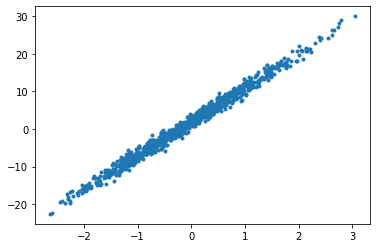

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

samples = 1000
X = np.random.randn(samples, 1)
noise = np.random.randn(samples, 1)
y = 2 + 9*X + noise
plt.plot(X,y, ".")

In [29]:
X = np.c_[np.ones(samples), X] # DONT USE MORE THE ONCE ## Concatinates 
X

array([[ 1.        ,  1.75825972],
       [ 1.        ,  0.02596641],
       [ 1.        ,  0.8900376 ],
       ...,
       [ 1.        , -1.60152363],
       [ 1.        , -0.17120807],
       [ 1.        ,  0.53008718]])

## Train|test split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

In [42]:
def gradient_descent(X, y, learning_rate = .1, iterations = 100):
    m = len(X)

    theta = np.random.randn(X.shape[1], 1)

    for _ in range(iterations):
        gradient = 2/m * X.T @ (X @ theta - y)
        theta -= learning_rate*gradient
    
    return theta

theta = gradient_descent(X_train, y_train)
theta.reshape(-1)

array([2.01746701, 8.99534254])

In [85]:
epochs = range(1,200, 1)
thetas = np.array([gradient_descent(X_train, y_train, iterations = epoch).reshape(-1) for epoch in epochs])
thetas.shape

(199, 2)

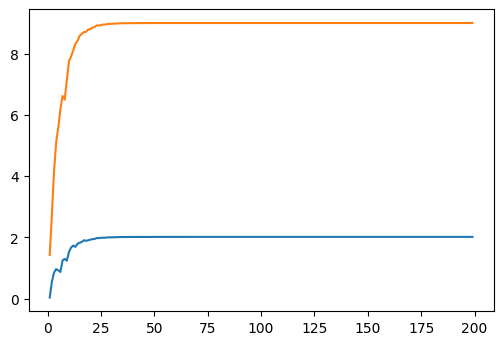

In [86]:
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(epochs, thetas)

## Stochastic gradient descent (SGD)

In [92]:
epochs = 5 
t0, t1 = 5, 50 # learning schedule parameters


def learning_rate_schedule(t):
    """"Decrease learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_rate_schedule(epoch*m + i)
        theta -= eta*gradients

theta

array([[1.98720861],
       [8.97758025]])